<a href="https://colab.research.google.com/github/Susmithareddya/CNN/blob/main/MNIST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

**Loading the MNIST dataset and splitting it into training, validation, and test sets**

In [ ]:
train_data, val_data, test_data = tfds.load("mnist",  
                                            split=['train[20%:]', 'train[0%:20%]', 'test'],
                                            as_supervised=True)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


**Defining a helper function to extract the images and labels from the dataset**

In [ ]:
def helper(ds):
  x, y = [], []
  for x_, y_ in tfds.as_numpy(ds):
    x.append(x_)
    y.append(y_)
  return np.asarray(x), np.asarray(y)

train_images, train_labels = helper(train_data)
val_images, val_labels = helper(val_data)
test_images, test_labels = helper(test_data)

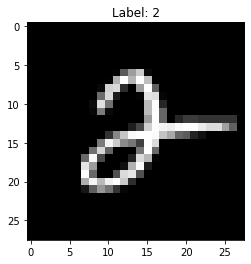

<Figure size 432x288 with 0 Axes>

In [ ]:
sample = 6
image = train_images[sample]
if image.shape[2] == 1:
    image = image[:, :, 0]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.title("Label: {}".format(train_labels[sample]))
plt.show()
plt.savefig('randomSample.jpg')

**Building the model**

In [ ]:
from keras.layers import Conv2D, Input, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

model = tf.keras.Sequential()

In [ ]:
model_test = tf.keras.Sequential()
model_test.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding="same"))
model_test.add(MaxPooling2D(pool_size=(2, 2),padding="valid"))
model_test.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding="same"))
model_test.add(MaxPooling2D(pool_size=(2, 2),padding="valid"))
model_test.add(Conv2D(32, (2,2), activation='relu',padding="same"))

model_test.add(Flatten())

model_test.add(Dense(128, activation='relu'))
model_test.add(Dropout(0.2))
model_test.add(Dense(10, activation='softmax'))

In [ ]:
model_test.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model_test.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          2080      
                                                                 
 flatten (Flatten)           (None, 1568)             

In [ ]:
history_test = model_test.fit(train_images, train_labels, validation_data=[val_images, val_labels], epochs=10)

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.3428 - accuracy: 0.9235 - val_loss: 0.0871 - val_accuracy: 0.9743
Epoch 2/10
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0912 - accuracy: 0.9724 - val_loss: 0.0877 - val_accuracy: 0.9765
Epoch 3/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0674 - accuracy: 0.9793 - val_loss: 0.0588 - val_accuracy: 0.9837
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.0749 - val_accuracy: 0.9804
Epoch 5/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0469 - accuracy: 0.9850 - val_loss: 0.0791 - val_accuracy: 0.9797
Epoch 6/10
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0600 - val_accuracy: 0.9828
Epoch 7/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0541 -

Text(0.5, 0, 'epochs')

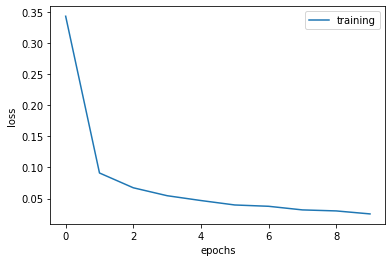

In [ ]:
plt.plot(history_test.history['loss'], label="training")
#plt.plot(history_test.history['val_loss'], label="validation")
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model_test.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0480 - accuracy: 0.9876


[0.047953858971595764, 0.9876000285148621]